#**#### Descriptive Analysis on Fake news ####**#

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
import nlu
import pandas as pd
import nltk
import numpy as np
import os
import sys
from sklearn.manifold import TSNE
import nlu
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from textblob import TextBlob
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tag import pos_tag 
from gensim.models import phrases, word2vec

st = PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaahmed17/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaahmed17/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaahmed17/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaahmed17/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df["merged"] = df.title +" "+ df.text 

**#### Preprocessing #### (Punctuation and Stopword Removal, Tokenization, Stemming and Lematization )**

In [ ]:
#### Preprocessing #### (Punctuation and Stopword Removal, Tokenization, Stemming and Lematization )
def preProcessing(df):
  df["clean_merged"]= df["merged"].str.replace('[^\w\s]','')  #For removing punctuation
  df["clean_merged"]= df['clean_merged'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop))  #For stopword removal
  df["clean_merged"]=df["clean_merged"].apply(lambda x: " ".join([st.stem(word) for word in x.split()])) #For Stemming
  df["clean_merged"]=df["clean_merged"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) # For lematization
  df["clean_merged"]=df["clean_merged"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) # For lematization
  return df

In [ ]:
preProcessed_df= preProcessing(df)

In [ ]:
preProcessed_df["clean_merged_tokenized"] = preProcessed_df.apply(lambda row: nltk.word_tokenize(row["clean_merged"]), axis=1) #For  tokenization

**#### Exploratory Data Analsysis ####**

**#Emotion and Hate Speech Detection (Sentiment Supported by NLU)**


In [ ]:
pipe = nlu.load('pos sentiment emotion bert')

pos_anc download started this may take some time.
Approximate size to download 3.9 MB
[OK!]
analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
predictions = pipe.predict(preProcessed_df['clean_merged'], output_level='token')

In [ ]:
predictions = predictions.drop_duplicates(subset='document', keep='first')

**# Top Word Frequency**

In [ ]:
word_count = Counter(" ".join(preProcessed_df["clean_merged"]).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
word_frequency

,Word,Frequency
0,the,304
1,mr,219
2,said,190
3,i,155
4,trump,141
5,state,107
6,one,103
7,year,101
8,u,99
9,would,95


**#Bigrams**

In [ ]:
df["clean_merged_tokenized_bigrams"] = preProcessed_df.apply(lambda row: phrases.Phrases(row["clean_merged_tokenized"]), axis=1) 

 **#### Bert Word Embedding ####**

**#Apply Bert Embedding** 

In [ ]:
mat = np.matrix([x for x in predictions.word_embedding_bert])
model = TSNE(n_components=2) 
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (49, 2)


**#Bert Embedding and Visualization**

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 14)


**#T-SNE BERT Embeddings, colored by Part of Speech Tag**

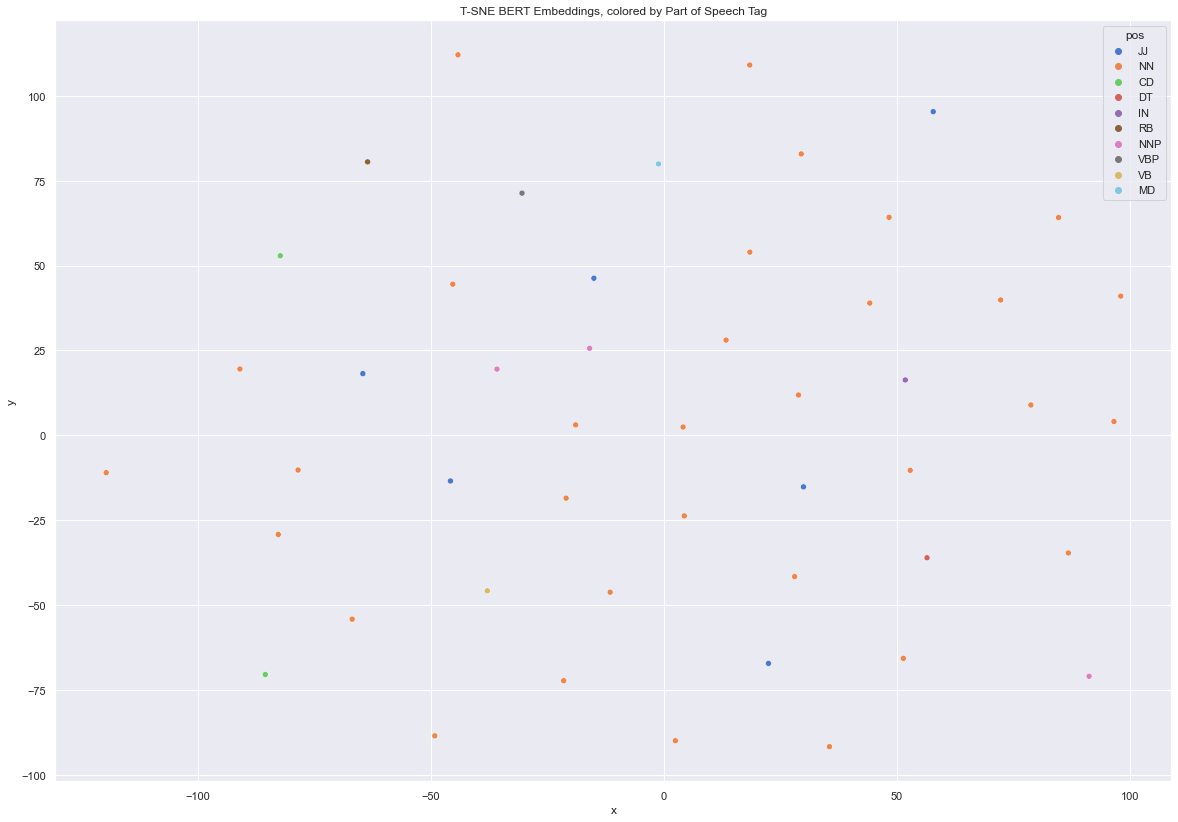

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.pos)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Part of Speech Tag')
plt.savefig('pos.png')

**#T-SNE BERT Embeddings, colored by Sarcasm**




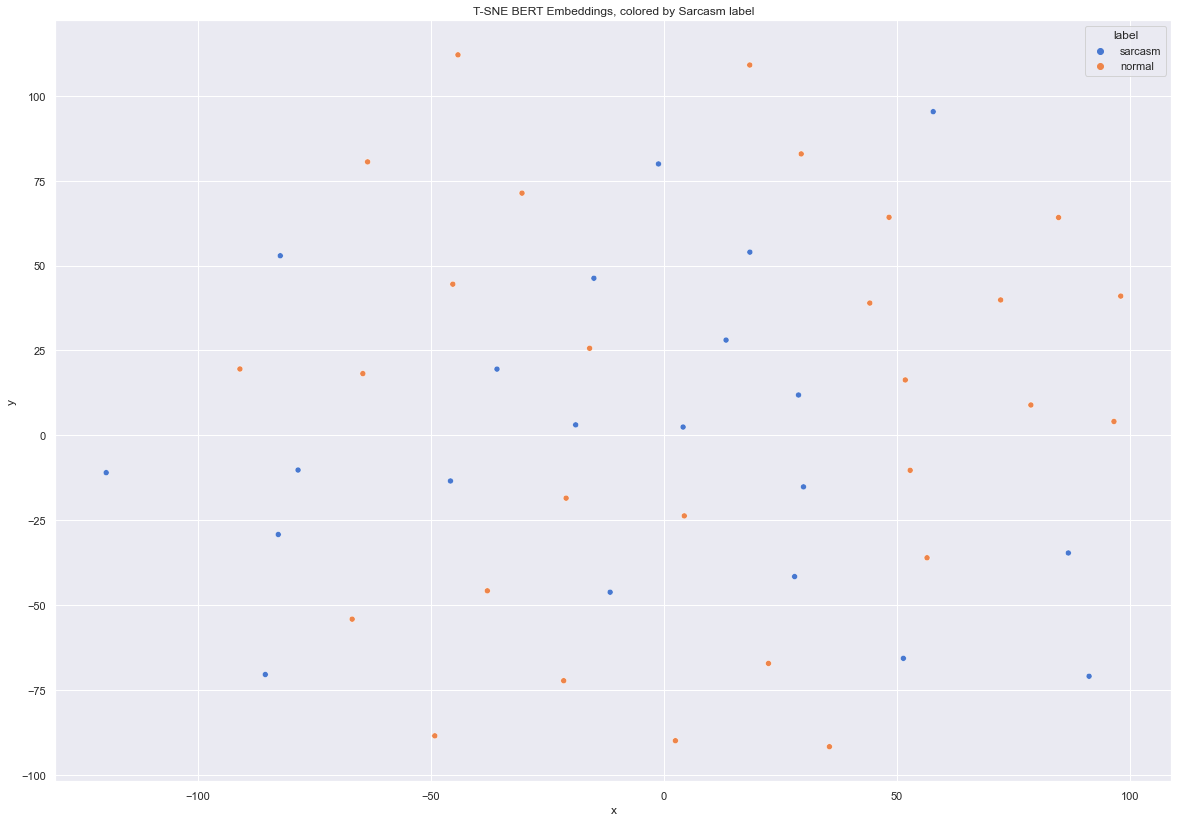

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, df.iloc[:low_dim_data.shape[0]].label.replace({1:'sarcasm',0:'normal'}))
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Sarcasm label')

plt.savefig('sarcasm.png')

**#T-SNE BERT Embeddings, colored by Sentiment**

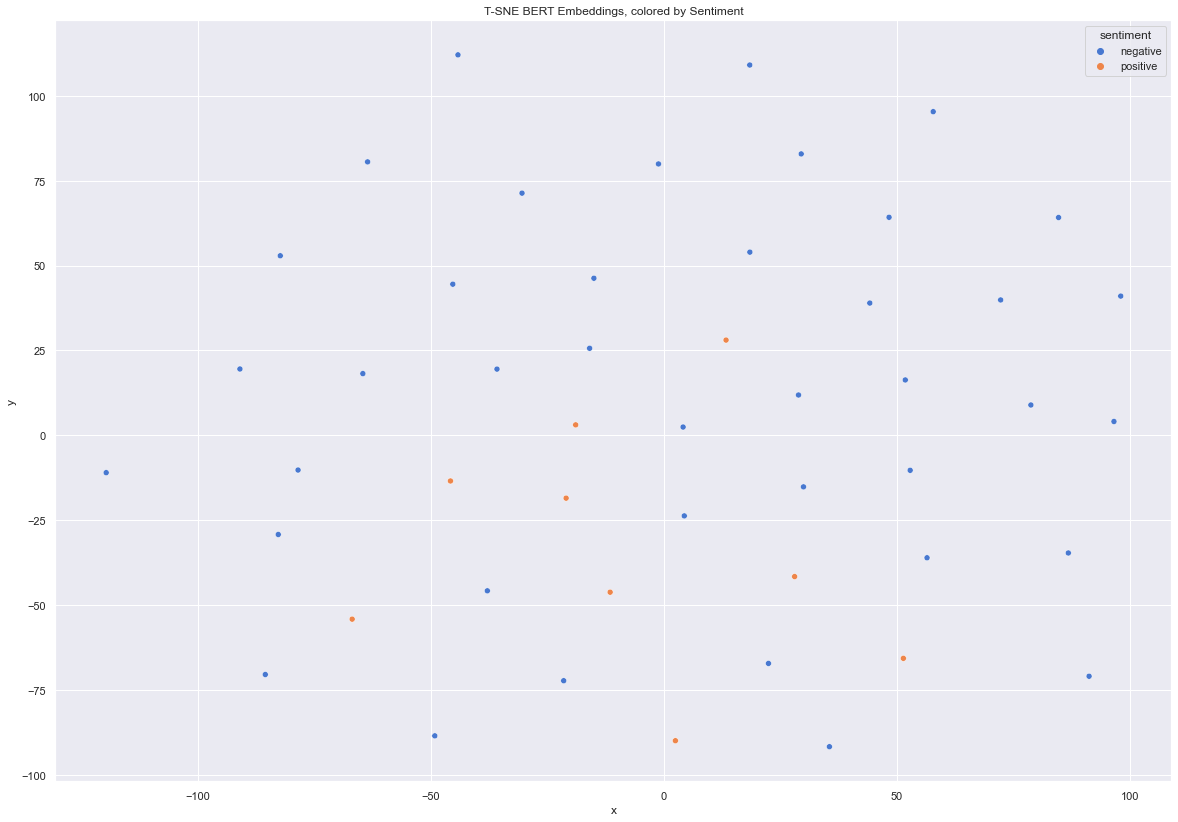

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Sentiment')
plt.savefig('sentiment.png')

**#T-SNE BERT Embeddings, colored by Emotion**

Text(0.5, 1.0, 'T-SNE BERT Embeddings, colored by Emotion')

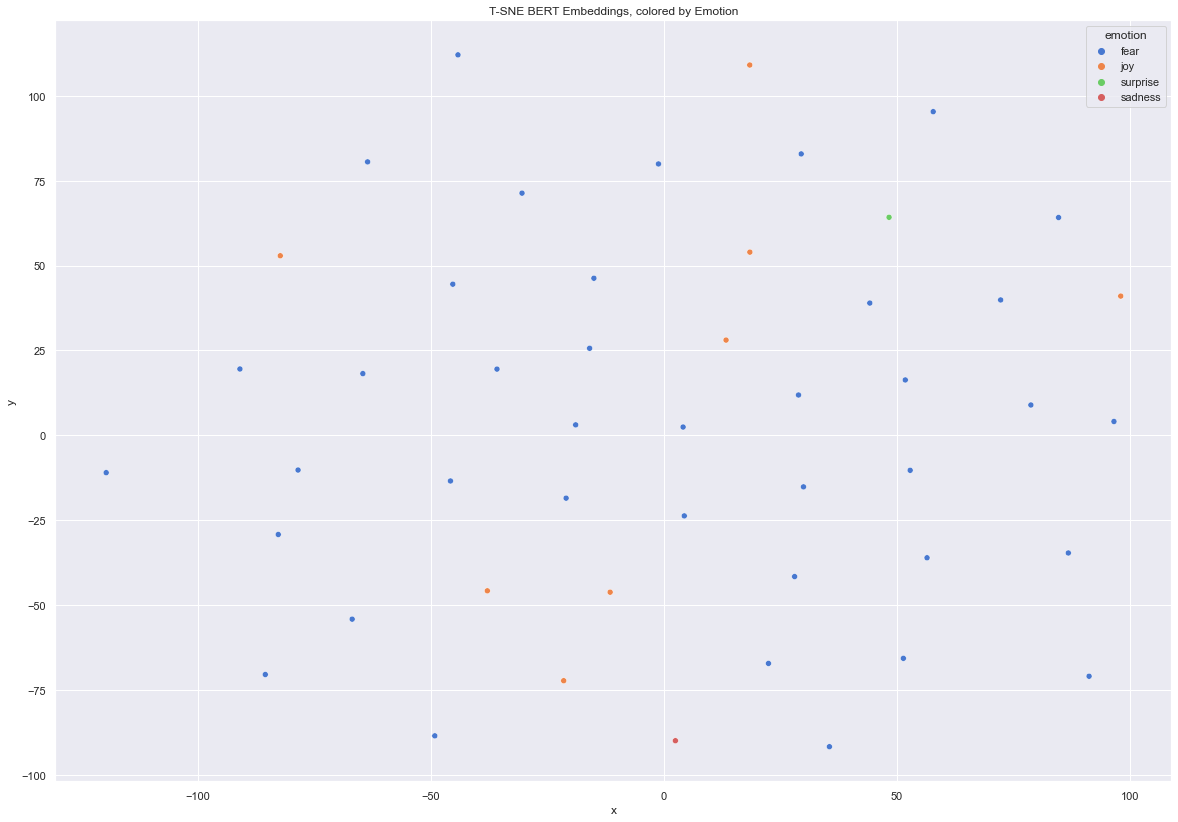

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.emotion)
tsne_df.columns = ['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE BERT Embeddings, colored by Emotion')

# **Things to be noted.**
Find 5 interesting and surprising facts from this data using visualization.
I have made the different TSNE graphs to see interesting facts about the data. The processed data having BERT Embedding from John Snow Labs - NLU provided with the following 

*  Part of Speech Tag
*  Emotions
*  Sentiment
*  Sarcasm

Currently, with limited resources (laptop has limited ram - 4GB and got poor broadband internet connections) proper analysis couldn't be performed and I was facing library issue in online Collab notebook. Hence, I used limited dataset to do the processing and analysis. If more resources could be take into consideration , the analysis would have been much better. 

I tested this code on IBM development server through my friend's credentials while using mobile data and the code was working fine there. If proper resources are provided, processing can be done on larger dataset and  visualization then can be analyzed.